In [16]:
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
import matplotlib.pyplot as plt
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

from sklearn.model_selection import train_test_split
import mglearn

Python version: 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
pandas version: 2.0.3
matplotlib version: 3.7.2
NumPy version: 1.23.5
SciPy version: 1.10.1
IPython version: 8.20.0
scikit-learn version: 1.2.2


### Kernelized Support Vector Machines (SVMs) – Simplified Explanation:

**Overview**:
Kernelized Support Vector Machines (SVMs) extend the capabilities of linear SVMs by allowing for the classification of data that is not linearly separable. This means that instead of just using straight lines (hyperplanes) to separate classes, kernelized SVMs can handle more complex boundaries.

### Key Concepts:

1. **Linear SVMs**:
   - Linear SVMs find the best hyperplane that separates two classes in the input space. This works well when data is linearly separable (i.e., can be divided by a straight line or hyperplane).
   - However, in many real-world scenarios, the data is not linearly separable, which limits the performance of linear models.

2. **Kernel Trick**:
   - The "kernel trick" is a key concept in kernelized SVMs. It allows us to project data into a higher-dimensional space where a linear separator (hyperplane) can be found.
   - By applying a kernel function, SVMs can create complex decision boundaries without explicitly transforming the data to a higher dimension, which saves computation and makes it feasible to work with high-dimensional data.

3. **Types of Kernels**:
   - Common kernels include:
     - **Polynomial Kernel**: Creates polynomial decision boundaries.
     - **Radial Basis Function (RBF) Kernel**: A popular choice that allows for flexible boundaries by measuring distance from data points.
     - **Sigmoid Kernel**: Similar to a neural network activation function, less commonly used.
  
4. **Classification with SVC**:
   - The `SVC` class in libraries like scikit-learn implements kernelized SVM for classification tasks.
   - The choice of kernel, along with parameters like `C` (regularization) and `gamma` (influence of single training examples), can significantly affect the model's performance.

### Why Use Kernelized SVMs?

- **Flexibility**: They can model complex relationships in data that are not easily captured by linear models.
- **Effective in High Dimensions**: They work well even when the number of features is larger than the number of samples.

### Mathematical Intuition (without deep details):
While the mathematical details of kernelized SVMs can be complex, the essence is that they transform the input data into a higher-dimensional space where linear separation is possible. This transformation is done implicitly through kernel functions, which compute similarities between data points.

### Example Application:
For instance, consider a synthetic dataset where classes are arranged in concentric circles. A linear SVM would struggle to separate the classes, but a kernelized SVM can effectively create a circular boundary to distinguish between the two classes.

### Summary:
Kernelized Support Vector Machines offer a powerful approach to classification tasks, especially in cases where data is not linearly separable. By utilizing kernel functions, they can create complex decision boundaries, making them versatile for various applications in machine learning.

Text(0, 0.5, 'Feature 1')

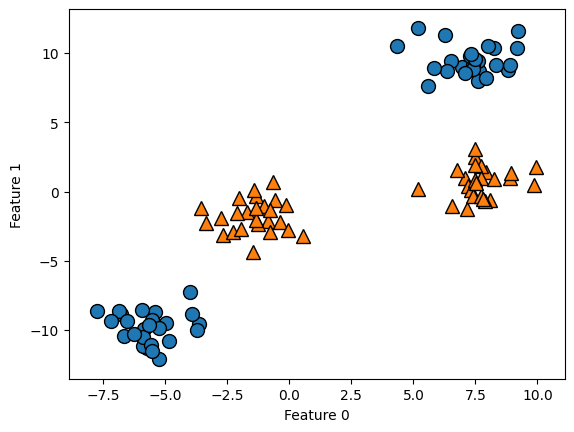

In [17]:
from sklearn.datasets import make_blobs


X, y = make_blobs(centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

c:\Users\faris\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(0, 0.5, 'Feature 1')

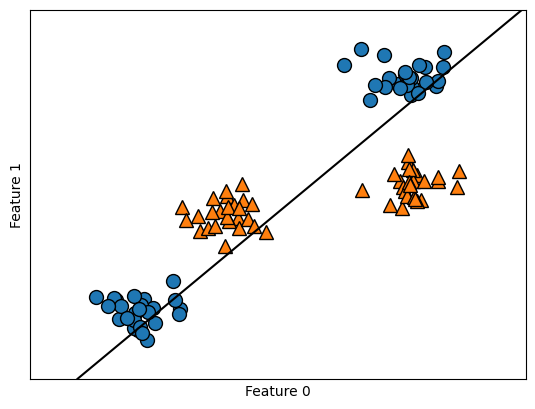

In [18]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [19]:
X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y == 0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
 cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
 cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

C:\Users\faris\AppData\Local\Temp\ipykernel_32248\4033285576.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
C:\Users\faris\AppData\Local\Temp\ipykernel_32248\4033285576.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',


Text(0.5, 0, 'feature1 ** 2')

<Figure size 640x480 with 0 Axes>

In [20]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
 cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
 cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature0 ** 2")

c:\Users\faris\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\faris\AppData\Local\Temp\ipykernel_32248\49093008.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
C:\Users\faris\AppData\Local\Temp\ipykernel_32248\49093008.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',


Text(0.5, 0, 'feature0 ** 2')

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Feature 1')

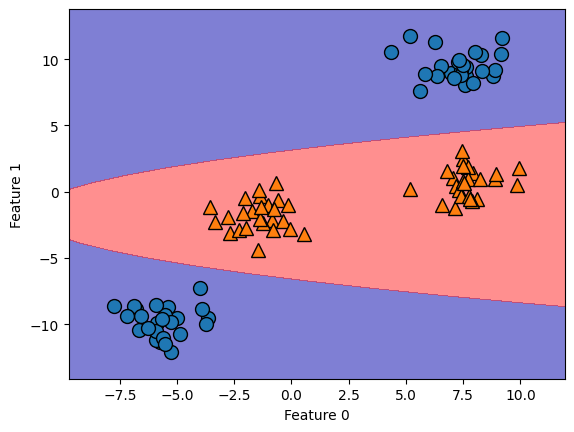

In [21]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
 cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")